In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

In [8]:
HISTORY_DIR = Path('../results/cv/')
filenames = ('cv_6W_imu_2024-05-12-20-11-19', 'cv_6W_imu_servo_2024-05-12-18-14-56')
labels = ('IMU', 'IMU + POWER')

In [9]:
results = {}
for filename in filenames:
    with open(HISTORY_DIR / (filename + '.json')) as fp:
        results[filename] = json.load(fp)

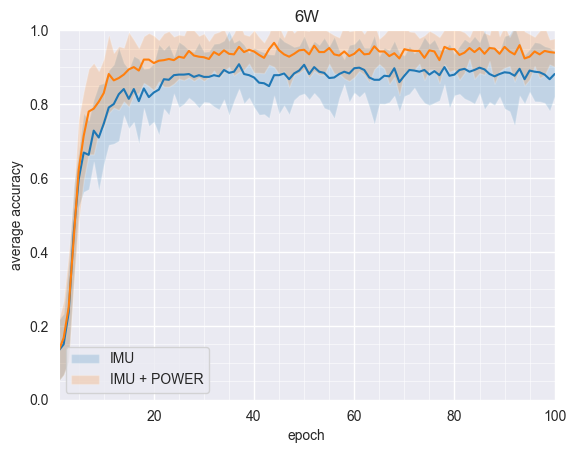

In [10]:
fig, ax = plt.subplots()
for result, label in zip(results.values(), labels):
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['accuracy'].values.tolist()).T
    x = np.arange(1, res_array.shape[0] + 1)
    average_acc = res_array.mean(axis=1)
    std_dev_acc = res_array.std(axis=1)
    ci = 2 * std_dev_acc
    ax.plot(x, average_acc)
    ax.fill_between(x, (average_acc - ci), (average_acc + ci), alpha=.2, label=label)
ax.set_xlim(1, 100)
ax.set_ylim(0, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('average accuracy')
ax.set_title('6W')
plt.grid(which='major', axis='both', linewidth=1)
plt.grid(which='minor', axis='both', linewidth=0.4)
plt.minorticks_on()
plt.legend()